## Rizqi Ilayya Firdaus

## Analisis Supermarket sales [ Historical record of sales data in 3 different supermarkets ]

### Konteks

Pertumbuhan supermarket di kota-kota berpenduduk semakin meningkat dan persaingan pasar juga tinggi. Dataset adalah salah satu penjualan historis perusahaan supermarket yang telah mencatat di 3 cabang berbeda selama 3 bulan data. 

Metode analisis data prediktif mudah diterapkan dengan dataset ini.

Acknowledgements / Ucapan Terima Kasih
Terima kasih kepada semua yang meluangkan waktu dan energi untuk melakukan kernel dengan dataset dan pengulas ini.

Inspirasi
Dataset ini dapat digunakan untuk tujuan analitik data prediksi.

#### Data diperoleh dari <a href="https://www.kaggle.com/aungpyaeap/supermarket-sales/version/1"> Kaggle.com </a>



<table align="right">
    <tr align="right">
        <td > Invoice id / ID Faktur </td>
        <td > Nomor identifikasi faktur penjualan yang dihasilkan komputer </td>
    </tr>
    <tr>
        <td > Branch / Cabang </td>
        <td > Cabang supercenter (3 cabang tersedia diidentifikasi oleh A, B dan C). </td>
    </tr>
    <tr>
        <td > City / Kota </td>
        <td > Lokasi supercenter </td>
    </tr>
    <tr>
        <td > Customer type / Jenis pelanggan </td>
        <td > Jenis pelanggan, direkam oleh Anggota untuk pelanggan menggunakan kartu anggota dan Normal untuk tanpa kartu anggota. </td>
    </tr>
    <tr>
        <td > Gender / Jenis Kelamin </td>
        <td align=""> Jenis kelamin pelanggan </td>
    </tr>
    <tr>
        <td align=""> Product line / Lini produk </td>
        <td align=""> Grup kategorisasi item umum - Asesoris elektronik, Asesoris fashion, Makanan dan minuman, Kesehatan dan kecantikan, Rumah dan gaya hidup, Olahraga dan perjalanan </td>
    </tr>
    <tr>
        <td align="justify"> Unit price / Harga satuan </td>
        <td align="justify"> Harga setiap produk dalam $ </td>
    </tr>
    <tr>
        <td align="justify"> Quantity / Kuantitas </td>
        <td align="justify"> Jumlah produk yang dibeli oleh pelanggan </td>
    </tr>
    <tr>
        <td align="justify"> Tax / Pajak </td>
        <td align="justify"> 5% biaya pajak untuk pembelian pelanggan </td>
    </tr>
    <tr>
        <td align="justify"> Total </td>
        <td align="justify"> Total harga termasuk pajak </td>
    </tr>
    <tr>
        <td align="justify"> Date / Tanggal </td>
        <td align="justify"> Tanggal pembelian (Catatan tersedia dari Januari 2019 hingga Maret 2019) </td>
    </tr>
    <tr>
        <td align="justify"> Time / Waktu </td>
        <td align="justify"> Waktu pembelian (10 pagi sampai 9 malam) </td>
    </tr>
    <tr>
        <td align="justify"> Payment / Pembayaran </td>
        <td align="justify"> Pembayaran digunakan oleh pelanggan untuk pembelian (tersedia 3 metode - Tunai, kartu kredit, dan Ewallet) </td>
    </tr>
    <tr>
        <td align="justify"> COGS / COGS </td>
        <td align="justify"> Harga pokok penjualan </td>
    </tr>
    <tr>
        <td align="justify"> Gross margin percentage / Persentase margin kotor </td>
        <td align="justify"> persentase margin kotor </td>
    </tr>
    <tr>
        <td align="justify"> Gross income / Penghasilan kotor </td>
        <td align="justify"> Penghasilan kotor </td>
    </tr>
    <tr>
        <td align="justify"> Rating / Peringkat </td>
        <td align="justify"> Peringkat stratifikasi pelanggan pada keseluruhan pengalaman berbelanja mereka (dalam skala 1 hingga 10) </td>
    </tr>
</table>


In [41]:
# Memanggil modul yang akan digunakan
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

%matplotlib inline
#data=pd.read_csv("https://myfristbucketdtsfgabda002.s3.amazonaws.com/vgsales.csv")

In [2]:
# Mengakses file dan membaca file dari S3
data = pd.read_excel('Downloads\supermarket_sales.xlsx')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## --------------------------------------------------------------------------

## 1.	Berdasarkan dataset yang dipilih, buatlah Scatter Plot untuk masing-masing features

## --------------------------------------------------------------------------

In [2]:
## a. Apakah jenis kelamin mempengaruhi jenis kenggotaan?
d1=data.filter(items=['Gender','Customer type'])
d1

,Gender,Customer type
0,Female,Member
1,Female,Normal
2,Male,Normal
3,Male,Member
4,Male,Normal
5,Male,Normal
6,Female,Member
7,Female,Normal
8,Female,Member
9,Female,Member


In [3]:
# Menghitung & mengelompokkan data Gender & Customer type

# d1.groupby(['Gender','Customer type']).count().reset_index()
# d1['Count'] = d1.groupby(['Gender'])['Customer type'].transform('count')
# d1.drop_duplicates()

#d1.groupby(['Gender','Customer type'], as_index=False).count()

Dilihat dari tabel di atas, kebanyakan perempuan lebih suka menjadi member dan kebanyakan laki-laki menjadi pelanggan biasa / bukan member.

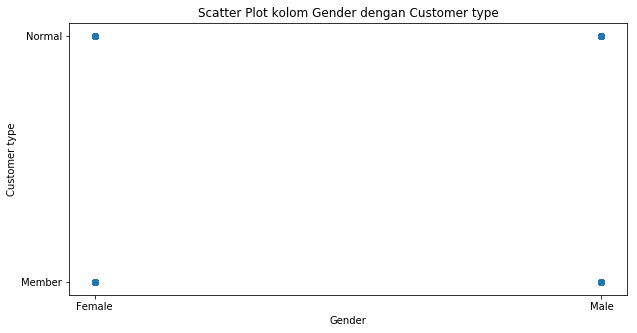

In [4]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Gender'], data['Customer type']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Customer type') # Memberi judul
plt.xlabel('Gender') # memberi label di bagian X
plt.ylabel('Customer type') # memberi label di bagian Y

plt.show() # Menampilkan scatter plot

In [5]:
# b. Apakah jenis kelamin mempengaruhi lini produk?

d2=data.filter(items=['Gender','Product line'])
d2

,Gender,Product line
0,Female,Health and beauty
1,Female,Electronic accessories
2,Male,Home and lifestyle
3,Male,Health and beauty
4,Male,Sports and travel
5,Male,Electronic accessories
6,Female,Electronic accessories
7,Female,Home and lifestyle
8,Female,Health and beauty
9,Female,Food and beverages


In [6]:
# Menghitung & mengelompokkan data Gender & Product line

#d2.groupby(['Gender','Product line'], as_index=False).count()

Dilihat dari tabel di atas, kebanyakan perempuan lebih banyak membeli barang pada lini produk Fashion accessories, Food and beverages dan Sports and travel, sedangkan laki-laki lebih banyak membeli barang pada lini produk Electronic accessories, Health and beauty dan Home and lifestyle.

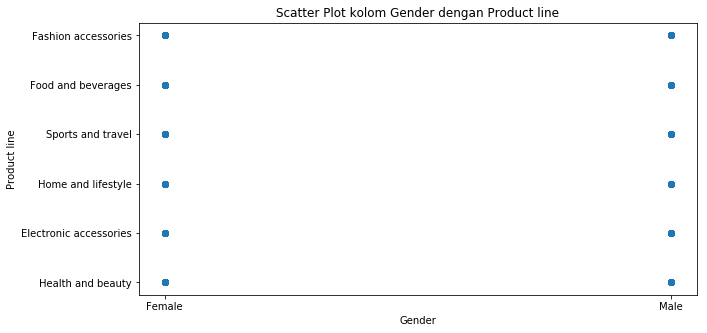

In [7]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Gender'], data['Product line']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Product line') # Memberi judul
plt.xlabel('Gender') # memberi label di bagian X
plt.ylabel('Product line') # memberi label di bagian Y

plt.show() # Menampilkan scatter plot

In [8]:
# c. Apakah jenis kelamin mempengaruhi banyaknya barang yang dibeli?

d3=data.filter(items=['Gender','Quantity'])
d3

,Gender,Quantity
0,Female,7
1,Female,5
2,Male,7
3,Male,8
4,Male,7
5,Male,7
6,Female,6
7,Female,10
8,Female,2
9,Female,3


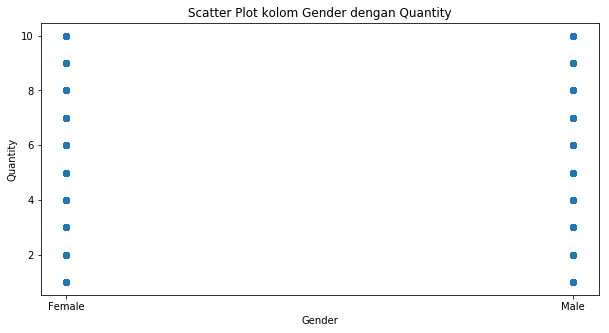

In [9]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Gender'], data['Quantity']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Quantity') # Memberi judul
plt.ylabel('Quantity') # memberi label di bagian Y
plt.xlabel('Gender') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

In [10]:
# d. Apakah jenis kelamin mempengaruhi jenis pembayaran?

d4=data.filter(items=['Gender','Payment'])
d4

,Gender,Payment
0,Female,Ewallet
1,Female,Cash
2,Male,Credit card
3,Male,Ewallet
4,Male,Ewallet
5,Male,Ewallet
6,Female,Ewallet
7,Female,Ewallet
8,Female,Credit card
9,Female,Credit card


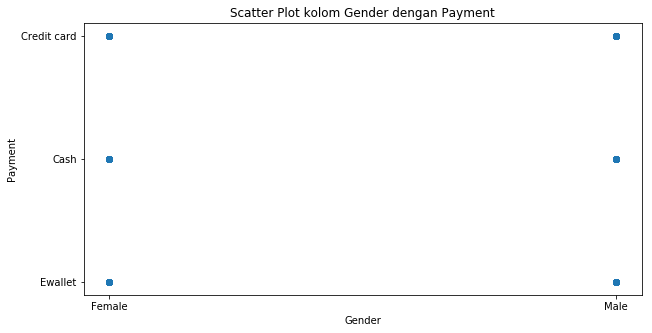

In [11]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Gender'], data['Payment']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Payment') # Memberi judul
plt.ylabel('Payment') # memberi label di bagian Y
plt.xlabel('Gender') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

In [12]:
# e. Apakah jenis kelamin mempengaruhi jenis peringkat yang diberi?

d5=data.filter(items=['Gender','Rating'])
d5

,Gender,Rating
0,Female,9.1
1,Female,9.6
2,Male,7.4
3,Male,8.4
4,Male,5.3
5,Male,4.1
6,Female,5.8
7,Female,8.0
8,Female,7.2
9,Female,5.9


In [13]:
#d5.groupby(['Gender','Rating']).count().reset_index()
#d5=d5.groupby(['Rating','Gender'], as_index=False).count()
d5['Count'] = d5.groupby(['Rating'])['Gender'].transform('count')
d5.drop_duplicates()

,Gender,Rating,Count
0,Female,9.1,14
1,Female,9.6,17
2,Male,7.4,16
3,Male,8.4,18
4,Male,5.3,11
5,Male,4.1,17
6,Female,5.8,14
7,Female,8.0,21
8,Female,7.2,18
9,Female,5.9,17


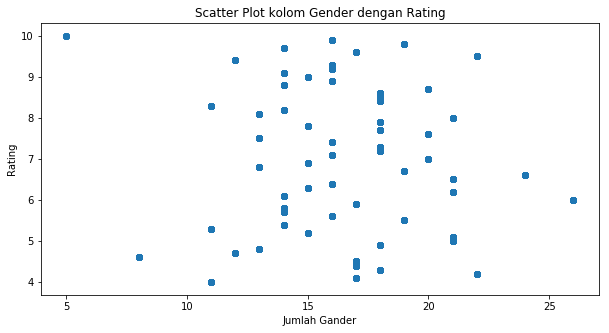

In [14]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(d5['Count'], d5['Rating']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Rating') # Memberi judul
plt.ylabel('Rating') # memberi label di bagian Y
plt.xlabel('Jumlah Gander') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

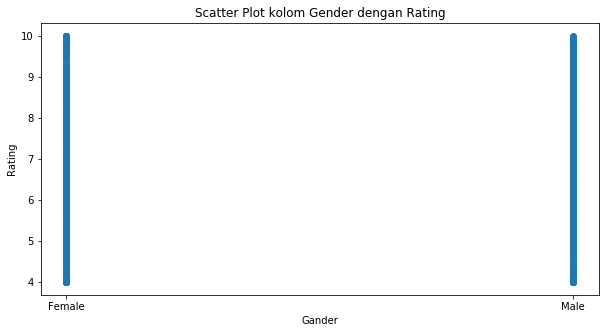

In [15]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(d5['Gender'], d5['Rating']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Gender dengan Rating') # Memberi judul
plt.ylabel('Rating') # memberi label di bagian Y
plt.xlabel('Gander') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

In [16]:
# f. Apakah Kota mempengaruhi total penjualan?

d6=data.filter(items=['City','Total'])
d6

,City,Total
0,Yangon,548.9715
1,Naypyitaw,80.2200
2,Yangon,340.5255
3,Yangon,489.0480
4,Yangon,634.3785
5,Naypyitaw,627.6165
6,Yangon,433.6920
7,Naypyitaw,772.3800
8,Yangon,76.1460
9,Mandalay,172.7460


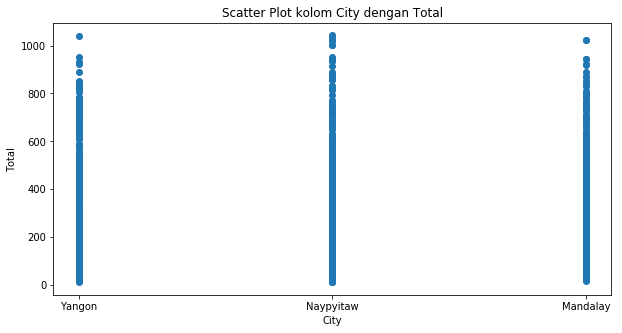

In [17]:
# MEMBUAT SCATTER PLOT DATA

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['City'], data['Total']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom City dengan Total') # Memberi judul
plt.ylabel('Total') # memberi label di bagian Y
plt.xlabel('City') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

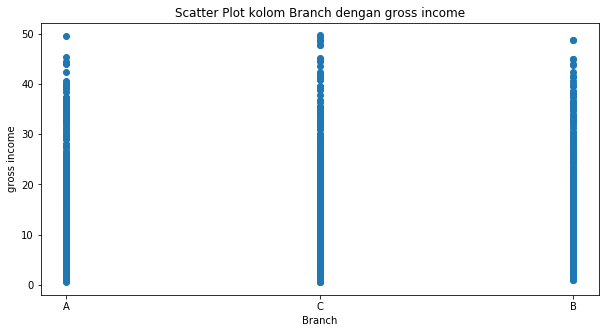

In [18]:
# g. Apakah Cabang mempengaruhi total Penghasilan kotor?

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Branch'], data['gross income']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Branch dengan gross income') # Memberi judul
plt.xlabel('Branch') # memberi label di bagian X
plt.ylabel('gross income') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

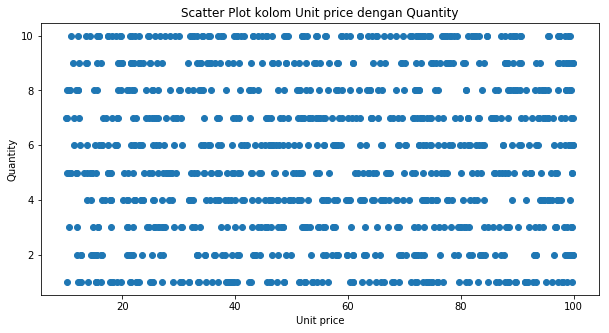

In [19]:
# h. Apakah Cabang mempengaruhi total Penghasilan kotor?

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Unit price'], data['Quantity']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Unit price dengan Quantity') # Memberi judul
plt.xlabel('Unit price') # memberi label di bagian X
plt.ylabel('Quantity') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

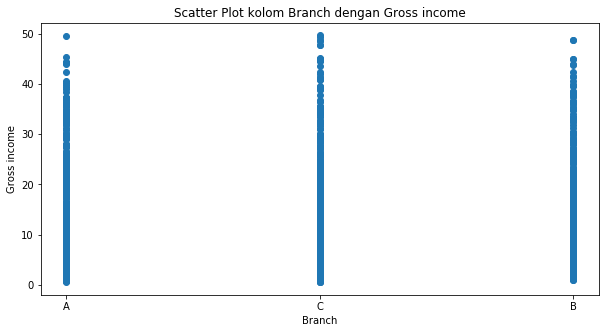

In [20]:
# i. Apakah Cabang mempengaruhi total Gross income?

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Branch'], data['gross income']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Branch dengan Gross income') # Memberi judul
plt.xlabel('Branch') # memberi label di bagian X
plt.ylabel('Gross income') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

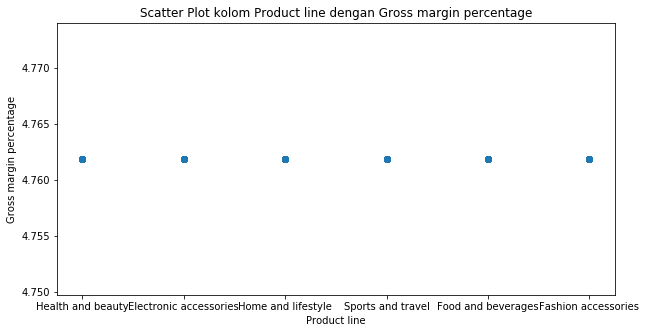

In [21]:
# j. Apakah Lini produk mempengaruhi Persentase margin kotor?

plt.figure(figsize=(10,5)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Product line'], data['gross margin percentage']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Product line dengan Gross margin percentage') # Memberi judul
plt.xlabel('Product line') # memberi label di bagian X
plt.ylabel('Gross margin percentage') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

C:\Users\dz\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


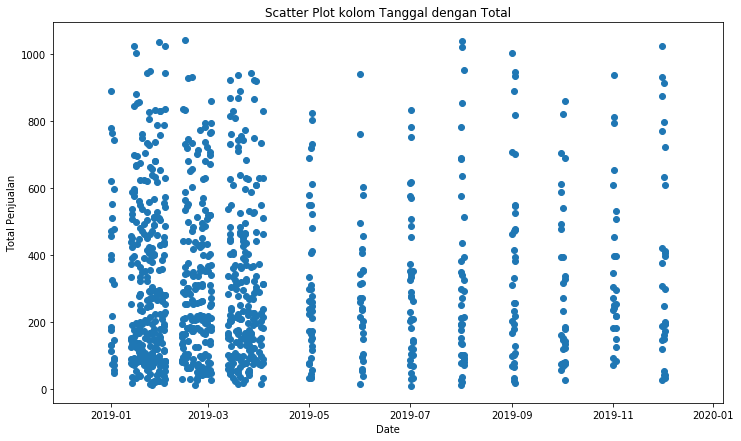

In [22]:
# k. Apakah tanggal mempengaruhi penjualan?

from datetime import *
plt.figure(figsize=(12,7)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Date'], data['Total']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Tanggal dengan Total') # Memberi judul
plt.xlabel('Date') # memberi label di bagian X
plt.ylabel('Total Penjualan') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

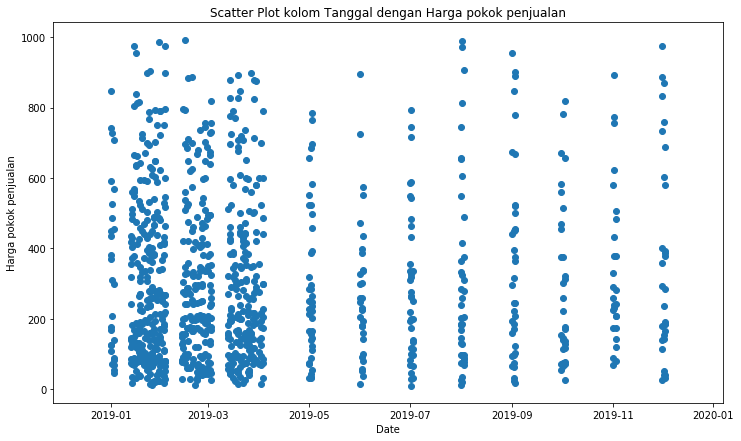

In [23]:
# l. Apakah tanggal mempengaruhi Harga pokok penjualan?

from datetime import *
plt.figure(figsize=(12,7)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Date'], data['cogs']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Tanggal dengan Harga pokok penjualan') # Memberi judul
plt.xlabel('Date') # memberi label di bagian X
plt.ylabel('Harga pokok penjualan') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot


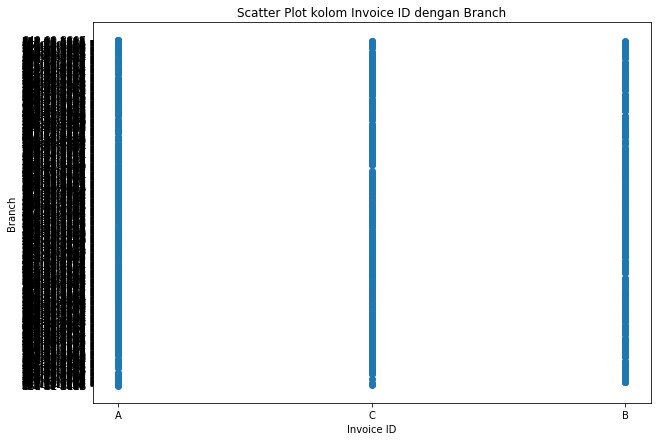

In [24]:
# m. Apakah Branch mempengaruhi Invoice ID?

plt.figure(figsize=(10,7)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Branch'], data['Invoice ID']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Invoice ID dengan Branch') # Memberi judul
plt.ylabel('Branch') # memberi label di bagian Y
plt.xlabel('Invoice ID') # memberi label di bagian Y
plt.show() # Menampilkan scatter plot

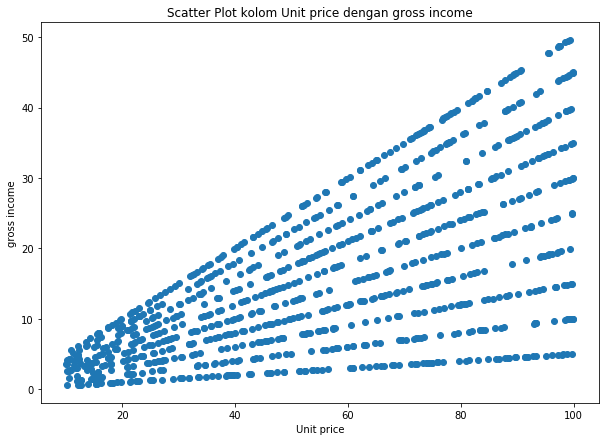

In [25]:
# n. Apakah Harga satuan mempengaruhi Penghasilan kotor?

plt.figure(figsize=(10,7)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Unit price'], data['gross income']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Unit price dengan gross income') # Memberi judul
plt.xlabel('Unit price') # memberi label di bagian X
plt.ylabel('gross income') # memberi label di bagian Y

plt.show() # Menampilkan scatter plot

## Identifikasi data outlier

In [6]:
import numpy as np

GI=data['gross income']
Harga=data['Unit price']

meanGI=np.mean(GI)
meanHarga=np.mean(Harga)
stdGI=np.std(GI)
stdHarga=np.std(Harga)

#dataClean=data[(np.abs((data['IPM']-meanIPM)/stdIPM)<=3)
               #& (np.abs((data['Tingkat Kemiskinan']-meanTingkat)/stdTingkat)<=3)]

In [7]:
dataClean=data[(np.abs((data['Unit price']-meanHarga)/stdHarga)<=3)
               & (np.abs((data['gross income']-meanGI)/stdGI)<=3)]

In [8]:
dataClean

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-10-01 00:00:00,17:15:00,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.2260,5.9


In [9]:
dataClean.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

data tersebut tidak memiliki outlier

## Observasi

C:\Users\dz\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000027C874C2BE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


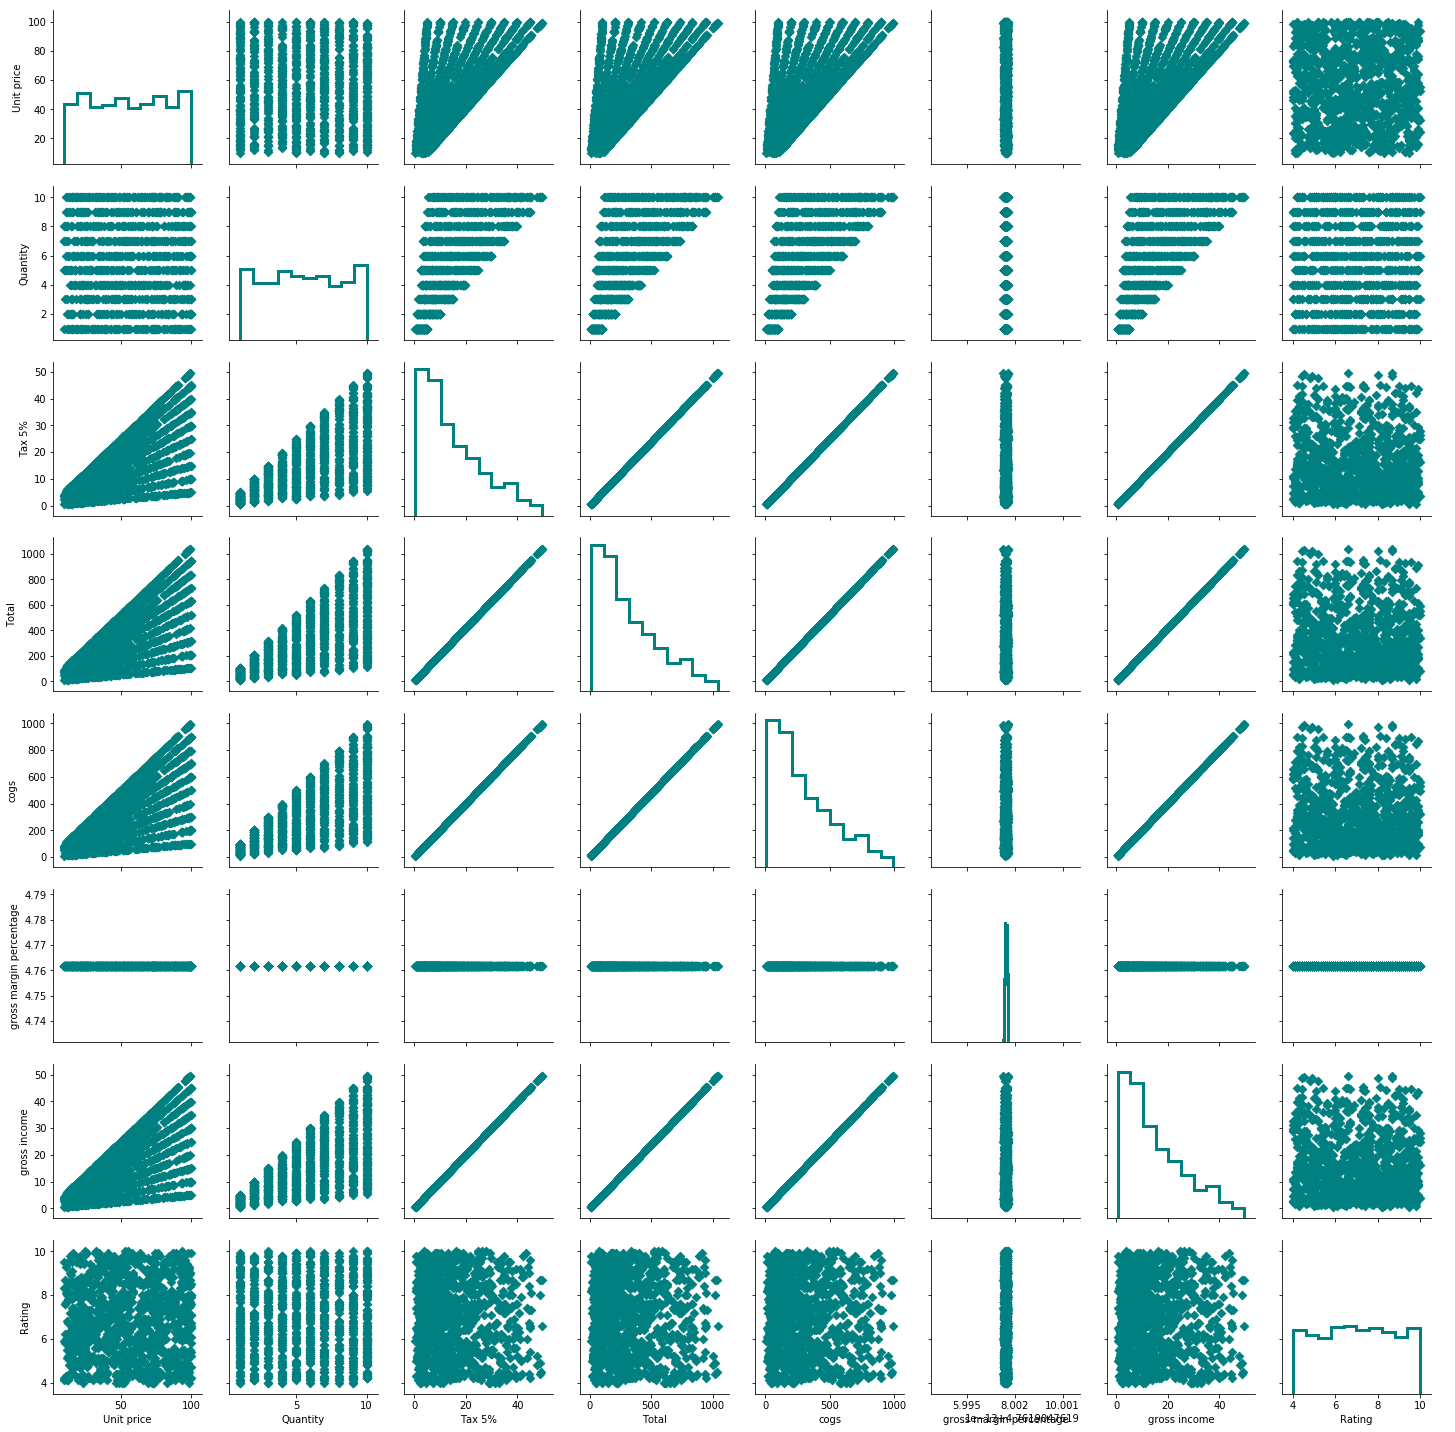

In [11]:
visual=sns.PairGrid(dataClean,hue_kws={"marker": ["D"]})
visual.map_diag(plt.hist,histtype="step",color='teal', linewidth=3)
visual.map_offdiag(plt.scatter,color='teal')
visual.add_legend()
plt.show()

## --------------------------------------------------------------------------

## 2. Berdasarkan pola data dari scatter plot (No. 1), pilih 2 features yang memiliki dugaan kuat ada korelasi. Narasikan alasannya!

## --------------------------------------------------------------------------

Features yang dipilih ialah Harga dan Penghasilan kotor, dilihat dari scatter plot yang telah diberikan dapat disimpulkan bahwa plot tersebut adalah plot yang terbaik karena plot tersebut membentuk pola garis linear.

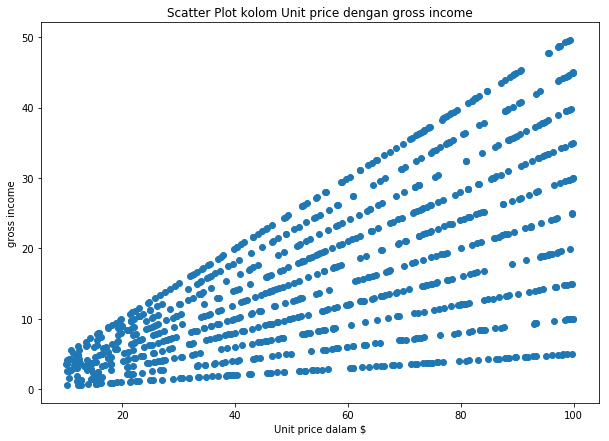

In [26]:
# n. Apakah Harga satuan mempengaruhi Penghasilan kotor?

plt.figure(figsize=(10,7)) # figur = mengakses figure | figsize = untuk mengubah ukuran
plt.scatter(data['Unit price'], data['gross income']) # Membuat Scatter Plot
plt.title('Scatter Plot kolom Unit price dengan gross income') # Memberi judul
plt.xlabel('Unit price dalam $') # memberi label di bagian X
plt.ylabel('gross income') # memberi label di bagian Y

plt.show() # Menampilkan scatter plot

## --------------------------------------------------------------------------

## 3. Buatlah statistik deskriptif dari beberapa 2 features yang dipilih. Berikan narasi terhadap statistik tersebut

## --------------------------------------------------------------------------

In [27]:
# Mendeklarasikan data

data2 = data[['Unit price','gross income']]

In [28]:
data2.describe()

,Unit price,gross income
count,1000.000000,1000.000000
mean,55.672130,15.379369
std,26.494628,11.708825
min,10.080000,0.508500
25%,32.875000,5.924875
50%,55.230000,12.088000
75%,77.935000,22.445250
max,99.960000,49.650000


#### Berdasarkan data di atas dapat diketahui bahwa
<ol type="i">
    <li> Nilai rata-rata dari harga barang yang dijual sebesar 55.672130 dan nilai rata-rata dari Penghasilan kotor selama 3 bulan sebesar 15.379369.</li>
    <li>Standar deviasi dari harga barang yang dijual sebesar 26.494628	 dan pada Penghasilan kotor sebesar 11.708825.</li>
    <li>Nilai minimun pada Harga barang adalah 10.08, sedangkan pada Penghasilan kotor adalah 0.5085.</li>
    <li>Kuartil pertama (25%) pada Harga barang bernilai 32.875, sedangkan pada Penghasilan kotor bernilai 5.924875.</li>
    <li>Kuartil kedua (50%) pada Harga barang bernilai 55.23, sedangkan pada Penghasilan kotor bernilai 12.088.</li>
    <li>Kuartil ketiga (75%) pada Harga barang bernilai 77.935, sedangkan pada Penghasilan kotor bernilai 22.44525.</li>
    <li>Nilai maksimum pada Harga barang sebesar 99.96, sedangkan pada Penghasilan kotor sebesar 49.65.</li>
</ol>


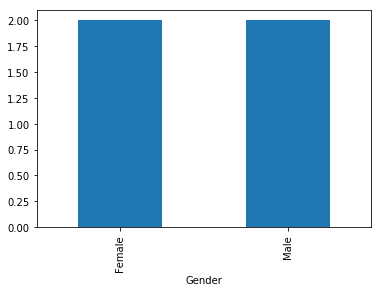

In [29]:
import matplotlib.pyplot as plt
databar = data.groupby('Gender')['Customer type'].nunique()
#print(databar)
databar.plot.bar()

plt.show()

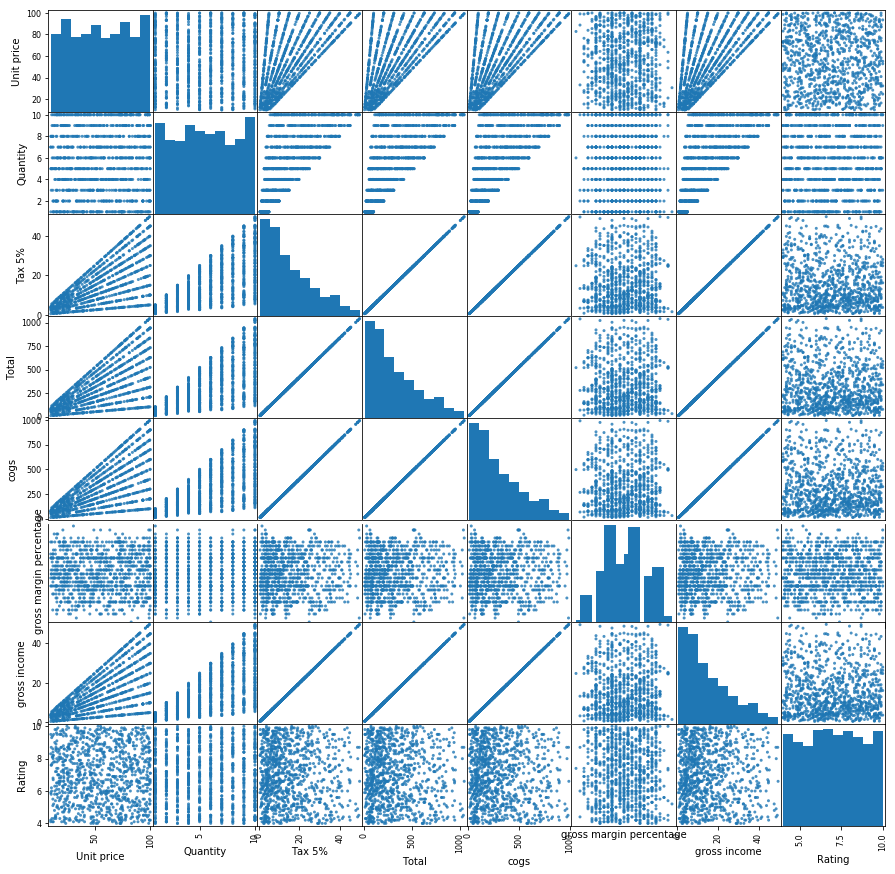

In [22]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Memvisualisasi data dalam bentuk scatter matrix plot
scatter_matrix(data, alpha=0.8, figsize=(15,15))

plt.show()

## --------------------------------------------------------------------------

## 4. Dari 2 features yang dipilih tersebut (No. 3), buatlah analisis model regresi (linear atau nonlinear). Jenis model regresi yang dipilih harus menyesuaikan pola sebaran data dari scatter plot. Model yang telah dibuat harus ditunjukkan secara visual dg grafik, serta tunjukkan tingkat keakuratannya (bisa menggunakan sembarang metrik)

## --------------------------------------------------------------------------

In [23]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [24]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Unit price']])
y_train = np.asanyarray(train[['gross income']])
regr.fit (x_train, y_train)

x_train = np.asanyarray(test[['Unit price']])
y_train = np.asanyarray(test[['gross income']])
y_train_ = regr.predict(x_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train_ - y_train)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_train_ - y_train) ** 2))
print("R2-score: %.2f" % r2_score(y_train_ , y_train) )

Coefficients:  [[0.28146404]]
Intercept:  [-0.35697294]
Mean absolute error: 7.51
Residual sum of squares (MSE): 87.11
R2-score: -0.57


In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = train[['Unit price']]
train_y = train[['gross income']]
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.28146404]]
Intercept:  [-0.35697294]


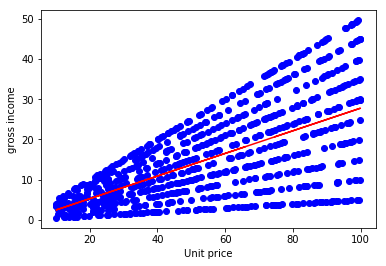

In [26]:
plt.scatter(train_x, train_y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Unit price")
plt.ylabel("gross income")
plt.show()

# ===============================

## Normalisasi Data

In [12]:
normalx =dataClean['Unit price']/max(dataClean['Unit price'])
normaly =dataClean['gross income']/max(dataClean['gross income'])

## Regresi Polinomial

POLINOMIAL: b0 = 0.019625, b1 = 0.394838, b2 = 0.319789, b3 = -0.177182 


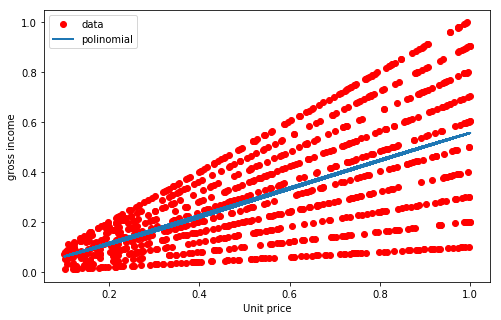

In [13]:
def polinomial(x, b0, b1,b2,b3):
    y = b0+(b1*x)+(b2*(x**2))+(b3*(x**3))
    return y
popt, pcov = curve_fit(polinomial, normalx, normaly)
print("POLINOMIAL: b0 = %f, b1 = %f, b2 = %f, b3 = %f " % (popt[0], popt[1], popt[2], popt[3]))
x = dataClean['Unit price']/max(dataClean['Unit price'])
plt.figure(figsize=(8,5))
y = polinomial(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=2.0, label='polinomial')
plt.legend(loc='best')
plt.ylabel('gross income')
plt.xlabel('Unit price')
plt.show()

In [14]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(polinomial, X_train.ravel(), y_train.ravel())
y_topi = polinomial(X_test, *popt)
print('MSE: %.4f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.4f' % r2_score(y_topi, y_test))

MSE: 0.0326
R-sq: -0.4470


## Regresi Sigmoid

 b1 = 2.763560, b2 = 0.878930


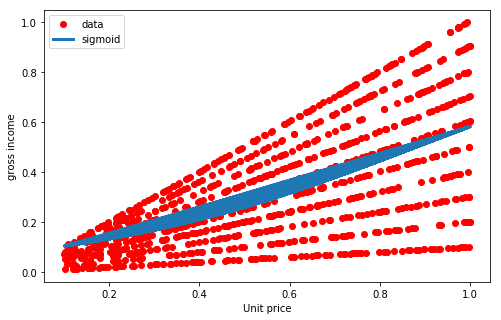

In [15]:
def sigmoid(x, b1, b2):
    y = 1 / (1 + np.exp(-b1*(x-b2)))
    return y
popt, pcov = curve_fit(sigmoid, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = dataClean['Unit price']/max(dataClean['Unit price'])
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='sigmoid')
plt.legend(loc='best')
plt.ylabel('gross income')
plt.xlabel('Unit price')
plt.show()

In [16]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(sigmoid, X_train.ravel(), y_train.ravel())
y_topi = sigmoid(X_test, *popt)
print('MSE: %.4f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.4f' % r2_score(y_topi, y_test))

MSE: 0.0328
R-sq: -0.5402


## Regresi Eksponensial

 b1 = 0.106968, b2 = 1.737554


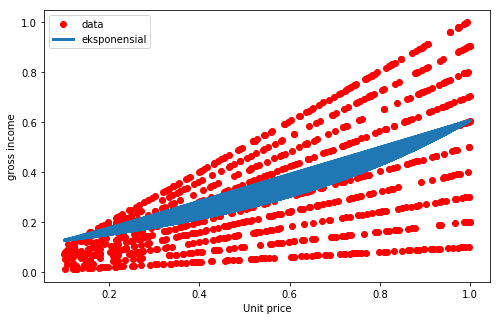

In [17]:
def eksponensial(x, b0, b1):
    y = b0*np.exp(b1*x)
    return y
popt, pcov = curve_fit(eksponensial, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = dataClean['Unit price']/max(dataClean['Unit price'])
plt.figure(figsize=(8,5))
y = eksponensial(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data',)
plt.plot(x,y, linewidth=3.0, label='eksponensial')
plt.legend(loc='best')
plt.ylabel('gross income')
plt.xlabel('Unit price')
plt.show()

In [18]:
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(eksponensial, X_train.ravel(), y_train.ravel())
y_topi = eksponensial(X_test, *popt)
print('MSE: %.2f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.2f' % r2_score(y_topi, y_test))

MSE: 0.03
R-sq: -0.71


## Regresi linear

 b1 = -0.004395, b2 = 0.564061


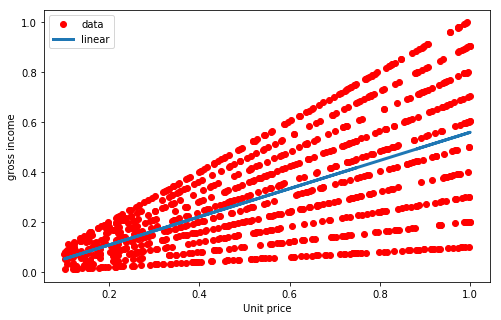

In [27]:
def linear(x, b0, b1):
    y = b0+(b1*x)
    return y
popt, pcov = curve_fit(linear, normalx, normaly)
print(" b1 = %f, b2 = %f" % (popt[0], popt[1]))
x = np.linspace(1960, 2015, 55)
x = dataClean['Unit price']/max(dataClean['Unit price'])
plt.figure(figsize=(8,5))
y = linear(x, *popt)
plt.plot(normalx, normaly, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='linear')
plt.legend(loc='best')
plt.ylabel('gross income')
plt.xlabel('Unit price')
plt.show()

In [28]:
X=np.array(normalx).reshape(-1,1)
Y=np.array(normaly).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.20,random_state=123)
popt, pcov = curve_fit(linear, X_train.ravel(), y_train.ravel())
y_topi = linear(X_test, *popt)
print('MSE: %.2f' % np.mean((y_topi-y_test)**2))
print('R-sq: %.2f' % r2_score(y_topi, y_test))

MSE: 0.03
R-sq: -0.44


## Evaluasi Model


1. Regresi Linear => MSE: 0.03, R-sq: -0.44
2. Regresi Polinomial => MSE: 0.037, R-sq: 0.0446
3. Regresi Eksponensial => MSE: 0.03, R-sq: -0.71
4. Regresi Sigmoid => MSE: 0.0328, R-sq: -0.5402

## --------------------------------------------------------------------------

## 5. Terhadap dataset yang diperoleh, lakukan pula analisis berikutnya (pilih salah satu): 

<ul>
    <li>Association</li>
    <li>Clustering</li>
    <li>Classification</li>
</ul>

## --------------------------------------------------------------------------

In [31]:
%matplotlib inline

In [32]:
print(data.shape)

(1000, 17)


In [33]:
print(data['Rating'].unique())

[ 9.1  9.6  7.4  8.4  5.3  4.1  5.8  8.   7.2  5.9  4.5  6.8  7.1  8.2
  5.7  4.6  6.9  8.6  4.4  4.8  5.1  9.9  6.   8.5  6.7  7.7  7.5  7.
  4.7  7.6  7.9  6.3  5.6  9.5  8.1  6.5  6.1  6.6  5.4  9.3 10.   6.4
  4.3  4.   8.7  9.4  5.5  8.3  7.3  4.9  4.2  9.2  7.8  5.2  9.   8.8
  6.2  9.8  9.7  5.   8.9]


In [34]:
print(data.groupby('Rating').size())

Rating
4.0     11
4.1     17
4.2     22
4.3     18
4.4     17
4.5     17
4.6      8
4.7     12
4.8     13
4.9     18
5.0     21
5.1     21
5.2     15
5.3     11
5.4     14
5.5     19
5.6     16
5.7     14
5.8     14
5.9     17
6.0     26
6.1     14
6.2     21
6.3     15
6.4     16
6.5     21
6.6     24
6.7     19
6.8     13
6.9     15
        ..
7.1     16
7.2     18
7.3     18
7.4     16
7.5     13
7.6     20
7.7     18
7.8     15
7.9     18
8.0     21
8.1     13
8.2     14
8.3     11
8.4     18
8.5     18
8.6     18
8.7     20
8.8     14
8.9     16
9.0     15
9.1     14
9.2     16
9.3     16
9.4     12
9.5     22
9.6     17
9.7     14
9.8     19
9.9     16
10.0     5
Length: 61, dtype: int64


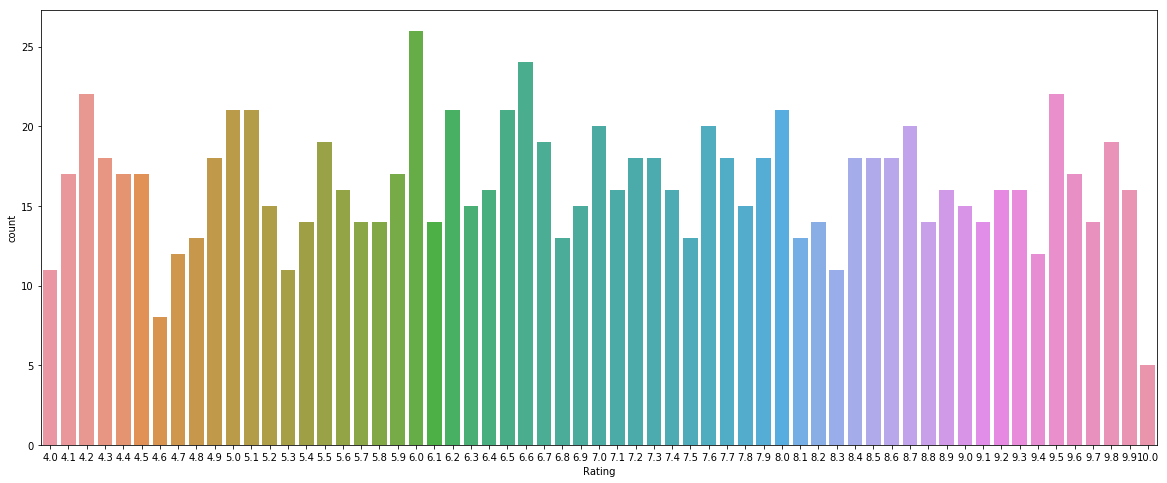

In [37]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot(data['Rating'],label="Count")
plt.show()

In [30]:
from sklearn.cluster import KMeans

In [31]:
from yellowbrick.cluster import KElbowVisualizer

In [45]:
kmeans.cluster_centers_

NameError: name 'kmeans' is not defined

In [46]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

NameError: name 'kmeans' is not defined

In [47]:
from yellowbrick.cluster import KElbowVisualizer

In [48]:
model = KMeans(random_state=0)

In [49]:
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

C:\Users\dz\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dz\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dz\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


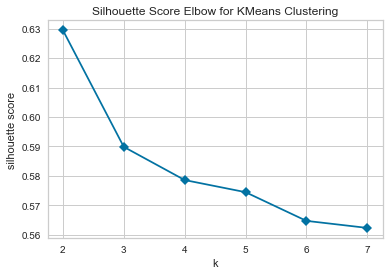

In [50]:
visualizer.fit(X)    
visualizer.poof()

In [51]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, marker='x', label = 'Centroids')
plt.title('Data points and cluster centroids')
plt.xlabel('Tingkat kemiskinan')
plt.ylabel('IPM')
plt.legend()
plt.show()

NameError: name 'y_kmeans' is not defined

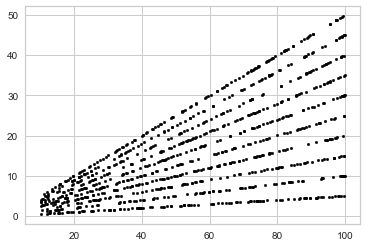

In [74]:
from copy import deepcopy
# Getting the values and plotting it
f1 = data['Unit price'].values
f2 = data['gross income'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [66]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [69]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[22. 15.]
 [31. 70.]]


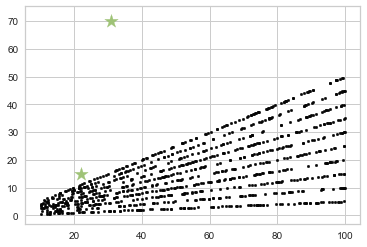

In [70]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [75]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

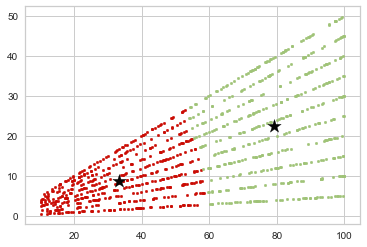

In [76]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## The scikit-learn approach
### Example 1
We will use the same dataset in this example.

In [71]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [72]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[22. 15.]
 [31. 70.]]
[[33.41427184  8.77180485]
 [79.30676289 22.39564845]]


You can see that the centroid values are equal, but in different order.

### Example 2
We will generate a new dataset using make_blobs function.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

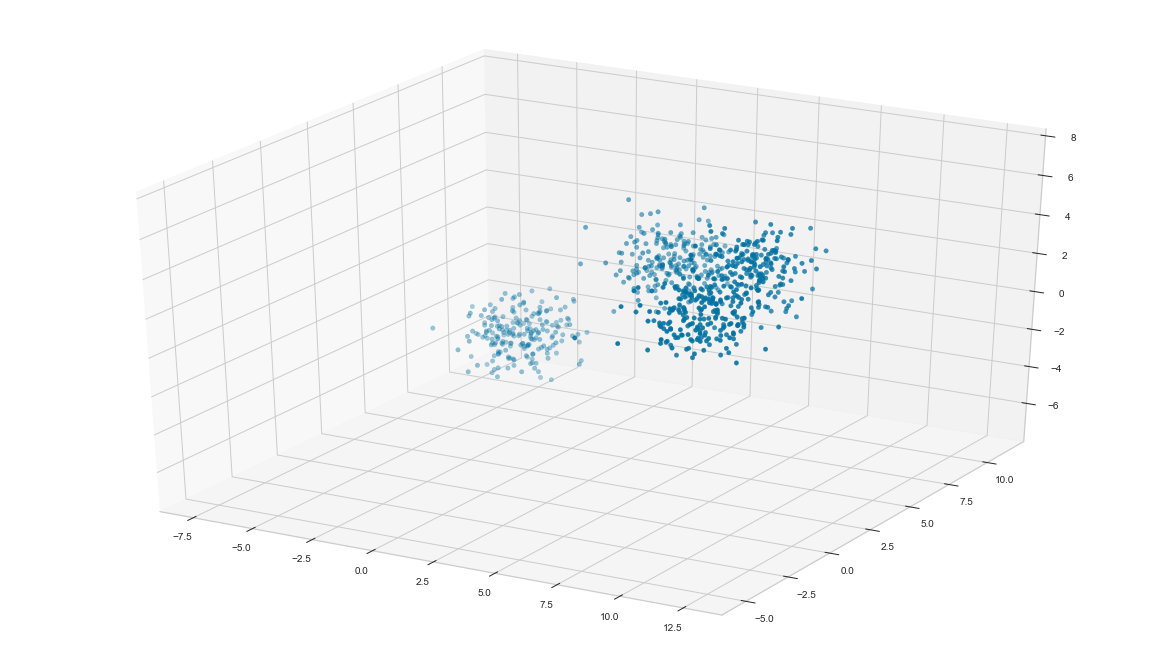

In [79]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2])

In [80]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

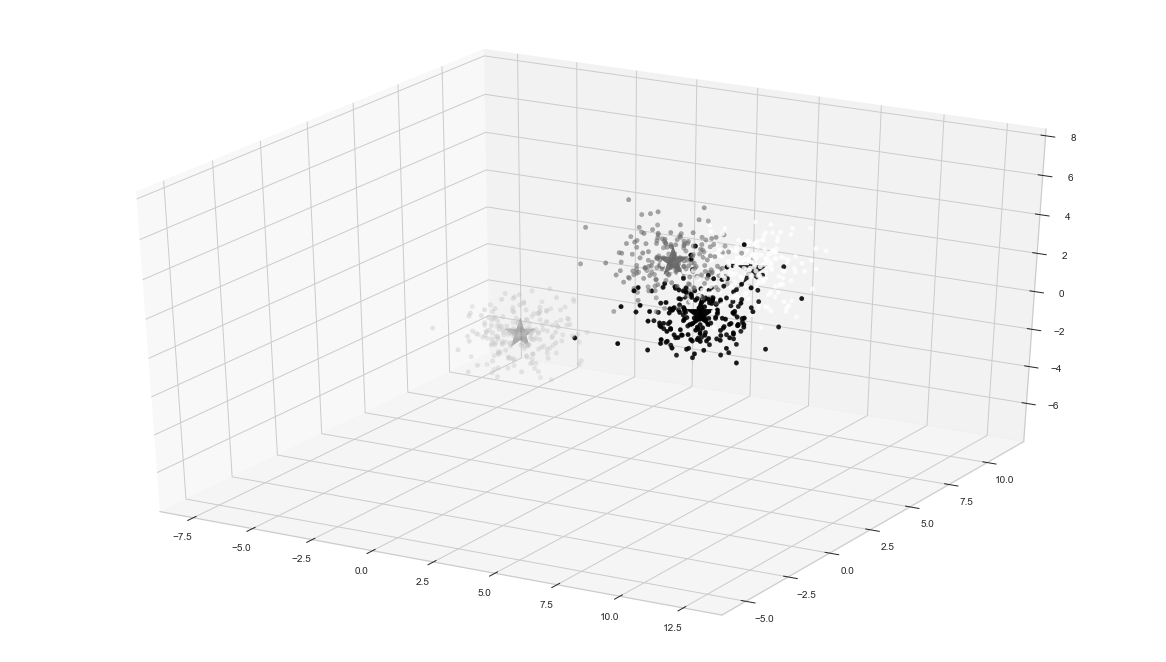

In [81]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)